In [2]:
#1. Read the file in DataFrame
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cricket.csv')

# Display the first few rows of the DataFrame
print(df.head())

   sr.no           name  matches  runs  catches  wickets  stumpings
0      1    Anil Dalpat      122  6755       56       12          0
1      2   Rohan Kanhay      144  1256       76      178          0
2      3  Avdhoot Dighe      265  8954      120        0          0
3      4       Bahubali       10   756        6       11          3
4      5      Leeladhar      234  2866      105      376          0


In [3]:
# 2. Extracting the 'name' and 'runs' columns
cricketers = df[['name', 'runs']]

# Display the names of cricketers and their respective runs
for index, row in cricketers.iterrows():
    print(f"Cricketer: {row['name']}, Runs: {row['runs']}")

Cricketer: Anil Dalpat, Runs: 6755
Cricketer: Rohan Kanhay, Runs: 1256
Cricketer: Avdhoot Dighe, Runs: 8954
Cricketer: Bahubali, Runs: 756
Cricketer: Leeladhar, Runs: 2866
Cricketer: Pradyumna, Runs: 5877
Cricketer: Dinesh Roy, Runs: 8537
Cricketer: Parmeshwar, Runs: 9466
Cricketer: Ali Durrani, Runs: 2756
Cricketer: Litesh Singh, Runs: 1099


In [4]:
# 3. Calculate the total number of wickets
total_wickets = df['wickets'].sum()

# Print the total wickets
print(f"Total wickets taken by all cricketers: {total_wickets}")


Total wickets taken by all cricketers: 790


In [5]:
# 4. Calculate the average number of catches
average_catches = df['catches'].mean()

# Print the average catches
print(f"Average number of catches taken by cricketers: {average_catches:.2f}")


Average number of catches taken by cricketers: 63.30


In [6]:
# 5. Find the names of cricketers who are wicketkeepers (stumpings > 0)
wicketkeepers = df[df['stumpings'] > 0]['name']

# Print the names of wicketkeepers
if not wicketkeepers.empty:
    print("Wicketkeepers in the list:")
    for name in wicketkeepers:
        print(name)
else:
    print("No wicketkeepers found.")


Wicketkeepers in the list:
Bahubali


In [7]:
# 6. Filter the DataFrame to only include bowlers (wickets > 0)
bowlers = df[df['wickets'] > 0]

# Find the bowler who played the highest number of matches
top_bowler = bowlers.loc[bowlers['matches'].idxmax()]

# Print the name of the bowler and the number of matches
print(f"Bowler with the highest number of matches: {top_bowler['name']}")
print(f"Matches played: {top_bowler['matches']}")


Bowler with the highest number of matches: Leeladhar
Matches played: 234


In [8]:
# 7. Filter the DataFrame to only include bowlers (wickets > 0)
bowlers = df[df['wickets'] > 0]

# Calculate the average number of matches played by bowlers
average_matches = bowlers['matches'].mean()

# Print the average number of matches
print(f"Average number of matches played by bowlers: {average_matches:.2f}")


Average number of matches played by bowlers: 130.25


In [9]:
# 8. Filter the DataFrame to only include bowlers (wickets > 0)
bowlers = df[df['wickets'] > 0]

# Calculate the bowling average for each bowler
bowlers['bowling_average'] = bowlers['wickets'] / bowlers['matches']

# Find the bowler with the least bowling average
least_bowling_average_bowler = bowlers.loc[bowlers['bowling_average'].idxmin()]

# Print the name of the bowler with the least bowling average and the average
print(f"Bowler with the least bowling average: {least_bowling_average_bowler['name']}")
print(f"Bowling average (wickets per match): {least_bowling_average_bowler['bowling_average']:.2f}")


Bowler with the least bowling average: Dinesh Roy
Bowling average (wickets per match): 0.08


<ipython-input-9-693365c3da04>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bowlers['bowling_average'] = bowlers['wickets'] / bowlers['matches']


In [10]:
# 8 with corrections. Filter the DataFrame to only include bowlers (wickets > 0)
bowlers = df[df['wickets'] > 0].copy()  # Make a copy to avoid SettingWithCopyWarning

# Calculate the bowling average for each bowler
bowlers.loc[:, 'bowling_average'] = bowlers['wickets'] / bowlers['matches']

# Find the bowler with the least bowling average
least_bowling_average_bowler = bowlers.loc[bowlers['bowling_average'].idxmin()]

# Print the name of the bowler with the least bowling average and the average
print(f"Bowler with the least bowling average: {least_bowling_average_bowler['name']}")
print(f"Bowling average (wickets per match): {least_bowling_average_bowler['bowling_average']:.2f}")


Bowler with the least bowling average: Dinesh Roy
Bowling average (wickets per match): 0.08


In [11]:
# 9. Calculate the catches per match ratio for each player
df['catches_per_match'] = df['catches'] / df['matches']

# Filter the DataFrame to include only players with a catches per match ratio > 0.5
high_catches_ratio_players = df[df['catches_per_match'] > 0.5]

# Print the information about these players
print("Players with catches per match ratio greater than 0.5:")
print(high_catches_ratio_players)

# Save the filtered DataFrame to a new CSV file
high_catches_ratio_players.to_csv('/content/drive/MyDrive/Colab Notebooks/high_catches_ratio_players.csv', index=False)


Players with catches per match ratio greater than 0.5:
   sr.no          name  matches  runs  catches  wickets  stumpings  \
1      2  Rohan Kanhay      144  1256       76      178          0   
3      4      Bahubali       10   756        6       11          3   
6      7    Dinesh Roy      211  8537      112       16          0   
9     10  Litesh Singh       89  1099       46       49          0   

   catches_per_match  
1           0.527778  
3           0.600000  
6           0.530806  
9           0.516854  


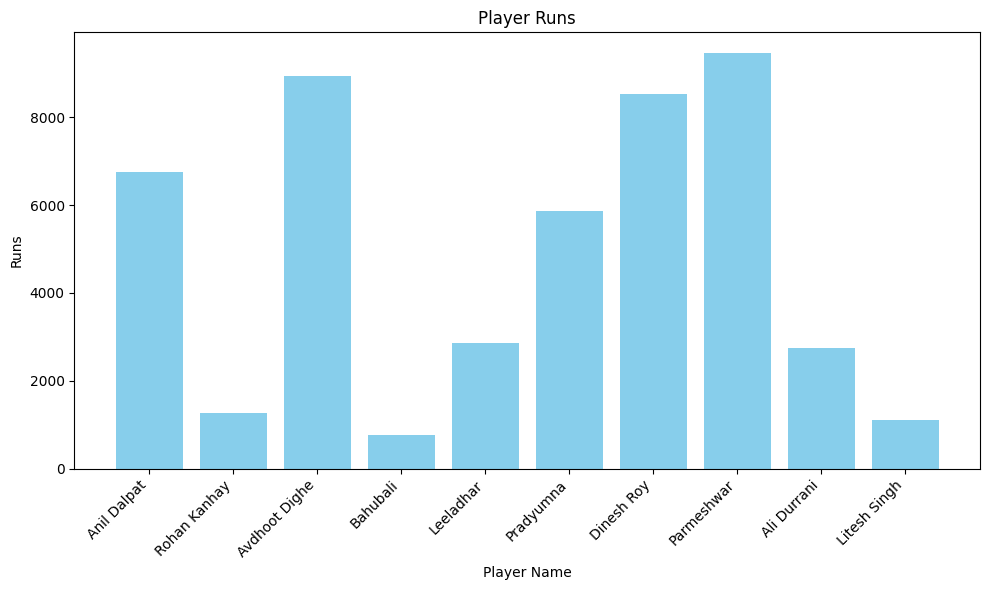

In [13]:
# 10. Extract player names and their runs
import matplotlib.pyplot as plt

player_names = df['name']
runs = df['runs']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(player_names, runs, color='skyblue')
plt.xlabel('Player Name')
plt.ylabel('Runs')
plt.title('Player Runs')
plt.xticks(rotation=45, ha='right')  # Rotate player names for better readability

# Display the bar chart
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [14]:
# 11. Sort the DataFrame by the 'runs' column in ascending order
sorted_df = df.sort_values(by='runs')

# Print the sorted DataFrame
print("Players sorted by ascending order of runs:")
print(sorted_df)


Players sorted by ascending order of runs:
   sr.no           name  matches  runs  catches  wickets  stumpings  \
3      4       Bahubali       10   756        6       11          3   
9     10   Litesh Singh       89  1099       46       49          0   
1      2   Rohan Kanhay      144  1256       76      178          0   
8      9    Ali Durrani       55  2756       12       26          0   
4      5      Leeladhar      234  2866      105      376          0   
5      6      Pradyumna      177  5877       47      122          0   
0      1    Anil Dalpat      122  6755       56       12          0   
6      7     Dinesh Roy      211  8537      112       16          0   
2      3  Avdhoot Dighe      265  8954      120        0          0   
7      8     Parmeshwar      245  9466       53        0          0   

   catches_per_match  
3           0.600000  
9           0.516854  
1           0.527778  
8           0.218182  
4           0.448718  
5           0.265537  
0           0.

In [15]:
# 12. Filter the DataFrame to include players where wickets > matches
players_with_more_wickets = df[df['wickets'] > df['matches']]

# Print the names of these players
print("Players with more wickets than matches:")
for name in players_with_more_wickets['name']:
    print(name)


Players with more wickets than matches:
Rohan Kanhay
Bahubali
Leeladhar
